In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns  # For enhanced data visualizations
%matplotlib inline

In [3]:
# To silence warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Selection

In [4]:
data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')
data.head(10)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
5,2019,USA,Midwest,Coffee,17.19,975.13,10.73,2.180,5,52.45,26.06,71.56,97.32,Water Management,353.16
6,1997,Argentina,Northeast,Fruits,23.46,1816.41,27.70,1.611,2,20.22,0.56,28.72,79.09,Organic Farming,480.61
7,2021,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,4,66.53,13.44,40.50,63.16,Drought-resistant Crops,1367.97
8,2012,India,Punjab,Wheat,32.08,1233.10,6.10,2.990,1,45.87,10.09,32.54,42.31,Water Management,761.89
9,2018,Nigeria,North West,Barley,21.23,475.32,25.74,0.765,1,25.74,44.38,72.92,84.21,No Adaptation,167.21


In [5]:
data.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


### Data Preprocessing

In [6]:
# Display column names
data.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

#### Machine Learning 

### Feature Engineering

In [8]:
# Step 2: Define Features and Target Variable
features = data[['Year','Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA']]
target = data['Crop_Yield_MT_per_HA']

In [9]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("\nData Split into Training and Testing Sets Successfully.\n")


Data Split into Training and Testing Sets Successfully.



### Model Selection

In [10]:
# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR  # For Support Vector Regression 
import xgboost as xgb # For XGBoost Regression

In [11]:
# Step 3: Build and Train the Models
# 1. Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
linear_pred = lin_reg.predict(X_test)
print("Linear Regressor Model Trained Successfully.\n")

Linear Regressor Model Trained Successfully.



In [12]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Model Trained Successfully.\n")

Random Forest Model Trained Successfully.



In [13]:
# 3. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Model Trained Successfully.\n")

Gradient Boosting Model Trained Successfully.



In [14]:
# 4. XGBoost Regressor
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Model Trained Successfully.\n")

XGBoost Model Trained Successfully.



In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Load the dataset
file_path = 'climate_change_impact_on_agriculture_2024.csv'  # Update the path as needed
df = pd.read_csv(file_path)

# Step 2: Data Preparation
features_rf = ['Average_Temperature_C', 'Total_Precipitation_mm', 'Soil_Health_Index',
               'CO2_Emissions_MT', 'Fertilizer_Use_KG_per_HA', 'Irrigation_Access_%']
target = 'Crop_Yield_MT_per_HA'

# Drop rows with missing values
df_cleaned = df.dropna(subset=features_rf + [target])

# Split into training and testing datasets (80% train, 20% test)
X_rf = df_cleaned[features_rf]
y = df_cleaned[target]
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Step 3: Grid Search for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

try:
    # Train the model using grid search
    grid_search.fit(X_train_rf, y_train)
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions with the best model
    y_pred_xgb = best_xgb_model.predict(X_test_rf)

    # Evaluate the model
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)

    # Display results
    print(f"Best Parameters: {best_params}")
    print(f"MSE: {mse_xgb}")
    print(f"RMSE: {rmse_xgb}")
    print(f"R2: {r2_xgb}")

except Exception as e:
    print(f"Grid search failed: {e}")
    print("Proceeding with default parameters for XGBoost.")

    # Fallback to default XGBoost parameters
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train_rf, y_train)
    y_pred_xgb = xgb_model.predict(X_test_rf)

    # Evaluate the fallback model
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)

    # Display results for default model
    print("Fallback XGBoost Model Results:")
    print(f"MSE: {mse_xgb}")
    print(f"RMSE: {rmse_xgb}")
    print(f"R2: {r2_xgb}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MSE: 0.7176310790613766
RMSE: 0.8471310872948629
R2: 0.3200851045822459


### Model Evaluation

In [16]:
# Step 4: Evaluate the Models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # For model evaluation metrics

In [17]:
# Function to Evaluate Models
def evaluate_model(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return {'MAE': mae, 'MSE': mse, 'R² Score': r2}

In [18]:
# Evaluate Linear Regressor
ln_results = evaluate_model(y_test,linear_pred)
print(f"Linear Regressor Results:\n MAE: {ln_results['MAE']}, MSE: {ln_results['MSE']}, R² Score: {ln_results['R² Score']}")

Linear Regressor Results:
 MAE: 0.8143205455027508, MSE: 0.983519670924331, R² Score: 0.06817068866017173


In [19]:
# Evaluate Random Forest Regressor
rf_results = evaluate_model(y_test, rf_predictions)
print(f"Random Forest Results:\n MAE: {rf_results['MAE']}, MSE: {rf_results['MSE']}, R² Score: {rf_results['R² Score']}")

Random Forest Results:
 MAE: 0.7272096425, MSE: 0.7474276997006125, R² Score: 0.29185449027799015


In [20]:
# Evaluate Gradient Boosting Regressor
gb_results = evaluate_model(y_test, gb_predictions)
print(f"Random Forest Results:\n MAE: {gb_results['MAE']}, MSE: {gb_results['MSE']}, R² Score: {gb_results['R² Score']}")

Random Forest Results:
 MAE: 0.7185184136050674, MSE: 0.7177450328255631, R² Score: 0.31997713982999365


In [21]:
# Evaluate XGBoost Regressor
xgb_results = evaluate_model(y_test, xgb_predictions)
print(f"Random Forest Results:\n MAE: {xgb_results['MAE']}, MSE: {xgb_results['MSE']}, R² Score: {xgb_results['R² Score']}")

Random Forest Results:
 MAE: 0.728280645749092, MSE: 0.752311968373541, R² Score: 0.28722692171129727


#### Saving my model

In [22]:
import joblib

In [23]:
joblib.dump(gb_model, 'ClimateAgric.pkl')

['ClimateAgric.pkl']

You must install pydot (`pip install pydot`) for `plot_model` to work.


[codecarbon WARNING @ 13:00:45] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:00:45] [setup] RAM Tracking...
[codecarbon INFO @ 13:00:45] [setup] GPU Tracking...
[codecarbon INFO @ 13:00:45] No GPU found.
[codecarbon INFO @ 13:00:45] [setup] CPU Tracking...
[codecarbon WARNING @ 13:00:45] No CPU tracking mode found. Falling back on CPU constant mode. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon WARNING @ 13:00:50] We saw that you have a 13th Gen Intel(R) Core(TM) i7-1355U but we don't know it. Please contact us.
[codecarbon INFO @ 13:00:50] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-1355U
[codecarbon INFO @ 13:00:50] >>> Tracker's metadata:
[codecarbon INFO @ 13:00:50]   Platform system: Windows-11-10.0.22631-SP0
[codecarbon INFO @ 13:00:50]   Python version: 3.12.4
[codecarbon INFO @ 13:00:50]   CodeCarbon version: 2.8.0
[codecarbon INFO @ 13:00:50]   Available RAM : 15.730

Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0596 - val_loss: 0.0488
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0504 - val_loss: 0.0486
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0491 - val_loss: 0.0484
Epoch 4/200
156/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0478

[codecarbon INFO @ 13:01:07] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:01:07] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:01:07] 0.000202 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0483 - val_loss: 0.0490
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0494 - val_loss: 0.0492
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0485 - val_loss: 0.0484
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0477 - val_loss: 0.0491
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0474 - val_loss: 0.0487
Epoch 9/200
245/250 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0484

[codecarbon INFO @ 13:01:22] Energy consumed for RAM : 0.000049 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:01:22] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:01:22] 0.000404 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0484 - val_loss: 0.0484
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0493 - val_loss: 0.0485
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0475 - val_loss: 0.0484
Epoch 12/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0482 - val_loss: 0.0484
Epoch 13/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0477 - val_loss: 0.0483
Epoch 14/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0479 - val_loss: 0.0483
Epoch 15/200
 68/250 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0476

[codecarbon INFO @ 13:01:37] Energy consumed for RAM : 0.000074 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:01:37] Energy consumed for all CPUs : 0.000532 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:01:37] 0.000605 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0479 - val_loss: 0.0495
Epoch 16/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0485 - val_loss: 0.0484
Epoch 17/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0489 - val_loss: 0.0486
Epoch 18/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0487 - val_loss: 0.0484
Epoch 19/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0486 - val_loss: 0.0484
Epoch 20/200
245/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0493

[codecarbon INFO @ 13:01:52] Energy consumed for RAM : 0.000098 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:01:52] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:01:52] 0.000807 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0493 - val_loss: 0.0484
Epoch 21/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0496 - val_loss: 0.0485
Epoch 22/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0482 - val_loss: 0.0485
Epoch 23/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0482 - val_loss: 0.0484
Epoch 24/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0474 - val_loss: 0.0498
Epoch 25/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0488 - val_loss: 0.0490
Epoch 26/200
209/250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0487

[codecarbon INFO @ 13:02:07] Energy consumed for RAM : 0.000123 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:02:07] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:02:07] 0.001009 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0486 - val_loss: 0.0484
Epoch 27/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0489 - val_loss: 0.0485
Epoch 28/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0484 - val_loss: 0.0483
Epoch 29/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0478 - val_loss: 0.0486
Epoch 30/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0474 - val_loss: 0.0493
Epoch 31/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0479 - val_loss: 0.0490
Epoch 32/200
180/250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0493

[codecarbon INFO @ 13:02:22] Energy consumed for RAM : 0.000148 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:02:22] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:02:22] 0.001211 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0491 - val_loss: 0.0485
Epoch 33/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0481 - val_loss: 0.0485
Epoch 34/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0477 - val_loss: 0.0491
Epoch 35/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0477 - val_loss: 0.0484
Epoch 36/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0486 - val_loss: 0.0489
Epoch 37/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0476 - val_loss: 0.0487
Epoch 38/200
134/250 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0481

[codecarbon INFO @ 13:02:37] Energy consumed for RAM : 0.000172 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:02:37] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:02:37] 0.001412 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0480 - val_loss: 0.0486
Epoch 39/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0473 - val_loss: 0.0486
Epoch 40/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0474 - val_loss: 0.0485
Epoch 41/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0469 - val_loss: 0.0486
Epoch 42/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0479 - val_loss: 0.0489
Epoch 43/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0485 - val_loss: 0.0485
Epoch 44/200
 87/250 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0466

[codecarbon INFO @ 13:02:52] Energy consumed for RAM : 0.000197 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:02:52] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:02:52] 0.001614 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:02:52] 0.006328 g.CO2eq/s mean an estimation of 199.5647685096153 kg.CO2eq/year


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0470 - val_loss: 0.0490
Epoch 45/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0478 - val_loss: 0.0486
Epoch 46/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0460 - val_loss: 0.0490
Epoch 47/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0469 - val_loss: 0.0490
Epoch 48/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0460 - val_loss: 0.0491
Epoch 49/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0462 - val_loss: 0.0493
Epoch 50/200
 12/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0411

[codecarbon INFO @ 13:03:07] Energy consumed for RAM : 0.000221 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:03:07] Energy consumed for all CPUs : 0.001595 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:03:07] 0.001816 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0459 - val_loss: 0.0505
Epoch 51/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0470 - val_loss: 0.0501
Epoch 52/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0456 - val_loss: 0.0504
Epoch 53/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0457 - val_loss: 0.0502
Epoch 54/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0459 - val_loss: 0.0497
Epoch 55/200
200/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0447

[codecarbon INFO @ 13:03:22] Energy consumed for RAM : 0.000246 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:03:22] Energy consumed for all CPUs : 0.001772 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:03:22] 0.002017 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0448 - val_loss: 0.0496
Epoch 56/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0427 - val_loss: 0.0502
Epoch 57/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0437 - val_loss: 0.0506
Epoch 58/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0438 - val_loss: 0.0528
Epoch 59/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0422 - val_loss: 0.0523
Epoch 60/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0418 - val_loss: 0.0535
Epoch 61/200
136/250 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0386 

[codecarbon INFO @ 13:03:37] Energy consumed for RAM : 0.000270 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:03:37] Energy consumed for all CPUs : 0.001949 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:03:37] 0.002219 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0396 - val_loss: 0.0537
Epoch 62/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0392 - val_loss: 0.0545
Epoch 63/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0383 - val_loss: 0.0559
Epoch 64/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0382 - val_loss: 0.0553
Epoch 65/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0372 - val_loss: 0.0569
Epoch 66/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0362 - val_loss: 0.0564
Epoch 67/200
113/250 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0349

[codecarbon INFO @ 13:03:52] Energy consumed for RAM : 0.000295 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:03:52] Energy consumed for all CPUs : 0.002126 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:03:52] 0.002421 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0350 - val_loss: 0.0564
Epoch 68/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0344 - val_loss: 0.0577
Epoch 69/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0317 - val_loss: 0.0583
Epoch 70/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0310 - val_loss: 0.0614
Epoch 71/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0295 - val_loss: 0.0613
Epoch 72/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0271 - val_loss: 0.0616
Epoch 73/200
 54/250 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0251

[codecarbon INFO @ 13:04:07] Energy consumed for RAM : 0.000320 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:04:07] Energy consumed for all CPUs : 0.002303 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:04:07] 0.002622 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0265 - val_loss: 0.0645
Epoch 74/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0264 - val_loss: 0.0645
Epoch 75/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0261 - val_loss: 0.0657
Epoch 76/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0241 - val_loss: 0.0656
Epoch 77/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0223 - val_loss: 0.0663
Epoch 78/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0218 - val_loss: 0.0676
Epoch 79/200
 28/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0218

[codecarbon INFO @ 13:04:22] Energy consumed for RAM : 0.000344 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:04:22] Energy consumed for all CPUs : 0.002480 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:04:22] 0.002824 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0211 - val_loss: 0.0681
Epoch 80/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0198 - val_loss: 0.0714
Epoch 81/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0193 - val_loss: 0.0693
Epoch 82/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0177 - val_loss: 0.0721
Epoch 83/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0168 - val_loss: 0.0708
Epoch 84/200
241/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0163

[codecarbon INFO @ 13:04:37] Energy consumed for RAM : 0.000369 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:04:37] Energy consumed for all CPUs : 0.002657 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:04:37] 0.003026 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0163 - val_loss: 0.0701
Epoch 85/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0159 - val_loss: 0.0724
Epoch 86/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0151 - val_loss: 0.0729
Epoch 87/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0147 - val_loss: 0.0729
Epoch 88/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0140 - val_loss: 0.0736
Epoch 89/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0139 - val_loss: 0.0712
Epoch 90/200
190/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135

[codecarbon INFO @ 13:04:52] Energy consumed for RAM : 0.000393 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:04:52] Energy consumed for all CPUs : 0.002835 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:04:52] 0.003228 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:04:52] 0.006328 g.CO2eq/s mean an estimation of 199.56304357171192 kg.CO2eq/year


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0135 - val_loss: 0.0728
Epoch 91/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0129 - val_loss: 0.0739
Epoch 92/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0120 - val_loss: 0.0728
Epoch 93/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0125 - val_loss: 0.0764
Epoch 94/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0118 - val_loss: 0.0766
Epoch 95/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0113 - val_loss: 0.0758
Epoch 96/200
 60/250 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0118

[codecarbon INFO @ 13:05:07] Energy consumed for RAM : 0.000418 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:05:07] Energy consumed for all CPUs : 0.003012 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:05:07] 0.003429 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0114 - val_loss: 0.0745
Epoch 97/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0109 - val_loss: 0.0725
Epoch 98/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0099 - val_loss: 0.0771
Epoch 99/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0097 - val_loss: 0.0775
Epoch 100/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0100 - val_loss: 0.0785
Epoch 101/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0099 - val_loss: 0.0759
Epoch 102/200
 24/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0087 

[codecarbon INFO @ 13:05:22] Energy consumed for RAM : 0.000442 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:05:22] Energy consumed for all CPUs : 0.003189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:05:22] 0.003631 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0092 - val_loss: 0.0768
Epoch 103/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0090 - val_loss: 0.0758
Epoch 104/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0088 - val_loss: 0.0785
Epoch 105/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0088 - val_loss: 0.0770
Epoch 106/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0087 - val_loss: 0.0758
Epoch 107/200
207/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0085

[codecarbon INFO @ 13:05:37] Energy consumed for RAM : 0.000467 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:05:37] Energy consumed for all CPUs : 0.003366 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:05:37] 0.003833 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0085 - val_loss: 0.0772
Epoch 108/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0084 - val_loss: 0.0758
Epoch 109/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0084 - val_loss: 0.0763
Epoch 110/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0079 - val_loss: 0.0782
Epoch 111/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0075 - val_loss: 0.0772
Epoch 112/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0076 - val_loss: 0.0761
Epoch 113/200
 31/250 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0074

[codecarbon INFO @ 13:05:52] Energy consumed for RAM : 0.000492 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:05:52] Energy consumed for all CPUs : 0.003543 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:05:52] 0.004035 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0076 - val_loss: 0.0749
Epoch 114/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0075 - val_loss: 0.0775
Epoch 115/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0073 - val_loss: 0.0774
Epoch 116/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0073 - val_loss: 0.0755
Epoch 117/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0069 - val_loss: 0.0767
Epoch 118/200
247/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0069

[codecarbon INFO @ 13:06:07] Energy consumed for RAM : 0.000516 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:06:07] Energy consumed for all CPUs : 0.003720 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:06:07] 0.004237 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0069 - val_loss: 0.0760
Epoch 119/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0068 - val_loss: 0.0741
Epoch 120/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0067 - val_loss: 0.0779
Epoch 121/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0068 - val_loss: 0.0747
Epoch 122/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0065 - val_loss: 0.0769
Epoch 123/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0063 - val_loss: 0.0759
Epoch 124/200
212/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065

[codecarbon INFO @ 13:06:22] Energy consumed for RAM : 0.000541 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:06:22] Energy consumed for all CPUs : 0.003897 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:06:22] 0.004438 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0064 - val_loss: 0.0766
Epoch 125/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0064 - val_loss: 0.0766
Epoch 126/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0060 - val_loss: 0.0778
Epoch 127/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0060 - val_loss: 0.0758
Epoch 128/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0065 - val_loss: 0.0772
Epoch 129/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0063 - val_loss: 0.0774
Epoch 130/200
149/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059

[codecarbon INFO @ 13:06:37] Energy consumed for RAM : 0.000565 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:06:37] Energy consumed for all CPUs : 0.004074 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:06:37] 0.004640 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0059 - val_loss: 0.0758
Epoch 131/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0059 - val_loss: 0.0749
Epoch 132/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0059 - val_loss: 0.0775
Epoch 133/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0058 - val_loss: 0.0752
Epoch 134/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0056 - val_loss: 0.0760
Epoch 135/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0056 - val_loss: 0.0792
Epoch 136/200
 86/250 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052

[codecarbon INFO @ 13:06:52] Energy consumed for RAM : 0.000590 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:06:52] Energy consumed for all CPUs : 0.004252 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:06:52] 0.004842 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:06:52] 0.006328 g.CO2eq/s mean an estimation of 199.56740460446477 kg.CO2eq/year


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0054 - val_loss: 0.0785
Epoch 137/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0055 - val_loss: 0.0765
Epoch 138/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0055 - val_loss: 0.0738
Epoch 139/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0052 - val_loss: 0.0778
Epoch 140/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0054 - val_loss: 0.0742
Epoch 141/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0053 - val_loss: 0.0745
Epoch 142/200
 22/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0050

[codecarbon INFO @ 13:07:07] Energy consumed for RAM : 0.000615 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:07:07] Energy consumed for all CPUs : 0.004429 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:07:07] 0.005043 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0051 - val_loss: 0.0734
Epoch 143/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0053 - val_loss: 0.0777
Epoch 144/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0051 - val_loss: 0.0740
Epoch 145/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0048 - val_loss: 0.0744
Epoch 146/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0050 - val_loss: 0.0778
Epoch 147/200
243/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050

[codecarbon INFO @ 13:07:22] Energy consumed for RAM : 0.000639 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:07:22] Energy consumed for all CPUs : 0.004606 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:07:22] 0.005245 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0050 - val_loss: 0.0755
Epoch 148/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0049 - val_loss: 0.0743
Epoch 149/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0049 - val_loss: 0.0759
Epoch 150/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0048 - val_loss: 0.0766
Epoch 151/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0048 - val_loss: 0.0727
Epoch 152/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0047 - val_loss: 0.0747
Epoch 153/200
200/250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047

[codecarbon INFO @ 13:07:37] Energy consumed for RAM : 0.000664 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:07:37] Energy consumed for all CPUs : 0.004783 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:07:37] 0.005447 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0047 - val_loss: 0.0747
Epoch 154/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0044 - val_loss: 0.0745
Epoch 155/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0046 - val_loss: 0.0745
Epoch 156/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0044 - val_loss: 0.0741
Epoch 157/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0046 - val_loss: 0.0746
Epoch 158/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0045 - val_loss: 0.0741
Epoch 159/200
172/250 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045

[codecarbon INFO @ 13:07:52] Energy consumed for RAM : 0.000688 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:07:52] Energy consumed for all CPUs : 0.004960 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:07:52] 0.005648 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0045 - val_loss: 0.0755
Epoch 160/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0043 - val_loss: 0.0740
Epoch 161/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0043 - val_loss: 0.0727
Epoch 162/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0043 - val_loss: 0.0721
Epoch 163/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0042 - val_loss: 0.0746
Epoch 164/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0045 - val_loss: 0.0712
Epoch 165/200
112/250 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045

[codecarbon INFO @ 13:08:07] Energy consumed for RAM : 0.000713 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:08:07] Energy consumed for all CPUs : 0.005137 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:08:07] 0.005850 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0043 - val_loss: 0.0725
Epoch 166/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0042 - val_loss: 0.0733
Epoch 167/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0043 - val_loss: 0.0739
Epoch 168/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0040 - val_loss: 0.0723
Epoch 169/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0042 - val_loss: 0.0743
Epoch 170/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0042 - val_loss: 0.0735
Epoch 171/200
 74/250 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0040

[codecarbon INFO @ 13:08:22] Energy consumed for RAM : 0.000737 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:08:22] Energy consumed for all CPUs : 0.005314 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:08:22] 0.006052 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0040 - val_loss: 0.0739
Epoch 172/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0037 - val_loss: 0.0731
Epoch 173/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0041 - val_loss: 0.0748
Epoch 174/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0040 - val_loss: 0.0737
Epoch 175/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0041 - val_loss: 0.0727
Epoch 176/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0038 - val_loss: 0.0757
Epoch 177/200
  1/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0041

[codecarbon INFO @ 13:08:37] Energy consumed for RAM : 0.000762 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:08:37] Energy consumed for all CPUs : 0.005492 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:08:37] 0.006254 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0038 - val_loss: 0.0740
Epoch 178/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0038 - val_loss: 0.0766
Epoch 179/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0038 - val_loss: 0.0733
Epoch 180/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0040 - val_loss: 0.0754
Epoch 181/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0038 - val_loss: 0.0753
Epoch 182/200
161/250 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039

[codecarbon INFO @ 13:08:52] Energy consumed for RAM : 0.000787 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:08:52] Energy consumed for all CPUs : 0.005669 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:08:52] 0.006456 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:08:52] 0.006328 g.CO2eq/s mean an estimation of 199.56659685764623 kg.CO2eq/year


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0038 - val_loss: 0.0740
Epoch 183/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0036 - val_loss: 0.0757
Epoch 184/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0037 - val_loss: 0.0741
Epoch 185/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0038 - val_loss: 0.0739
Epoch 186/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0039 - val_loss: 0.0739
Epoch 187/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0039 - val_loss: 0.0731
Epoch 188/200
 49/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0037

[codecarbon INFO @ 13:09:07] Energy consumed for RAM : 0.000811 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:09:07] Energy consumed for all CPUs : 0.005846 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:09:07] 0.006657 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0037 - val_loss: 0.0748
Epoch 189/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0037 - val_loss: 0.0726
Epoch 190/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0035 - val_loss: 0.0761
Epoch 191/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0035 - val_loss: 0.0717
Epoch 192/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0035 - val_loss: 0.0736
Epoch 193/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0036 - val_loss: 0.0737
Epoch 194/200
 15/250 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0035

[codecarbon INFO @ 13:09:22] Energy consumed for RAM : 0.000836 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:09:22] Energy consumed for all CPUs : 0.006023 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:09:22] 0.006859 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 0.0715
Epoch 195/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0035 - val_loss: 0.0729
Epoch 196/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0035 - val_loss: 0.0737
Epoch 197/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0036 - val_loss: 0.0749
Epoch 198/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0033 - val_loss: 0.0744
Epoch 199/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033

[codecarbon INFO @ 13:09:37] Energy consumed for RAM : 0.000860 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:09:37] Energy consumed for all CPUs : 0.006201 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:09:37] 0.007061 kWh of electricity used since the beginning.


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0033 - val_loss: 0.0712
Epoch 200/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0036 - val_loss: 0.0735


[codecarbon INFO @ 13:09:40] Energy consumed for RAM : 0.000865 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:09:40] Energy consumed for all CPUs : 0.006233 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:09:40] 0.007098 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:09:40] Tracker already stopped !
[codecarbon INFO @ 13:09:40] Energy consumed for RAM : 0.000865 kWh. RAM Power : 5.898877143859863 W
[codecarbon INFO @ 13:09:40] Energy consumed for all CPUs : 0.006233 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:09:40] 0.007098 kWh of electricity used since the beginning.


Emissions: 0.003341446061826801 kg CO2e
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


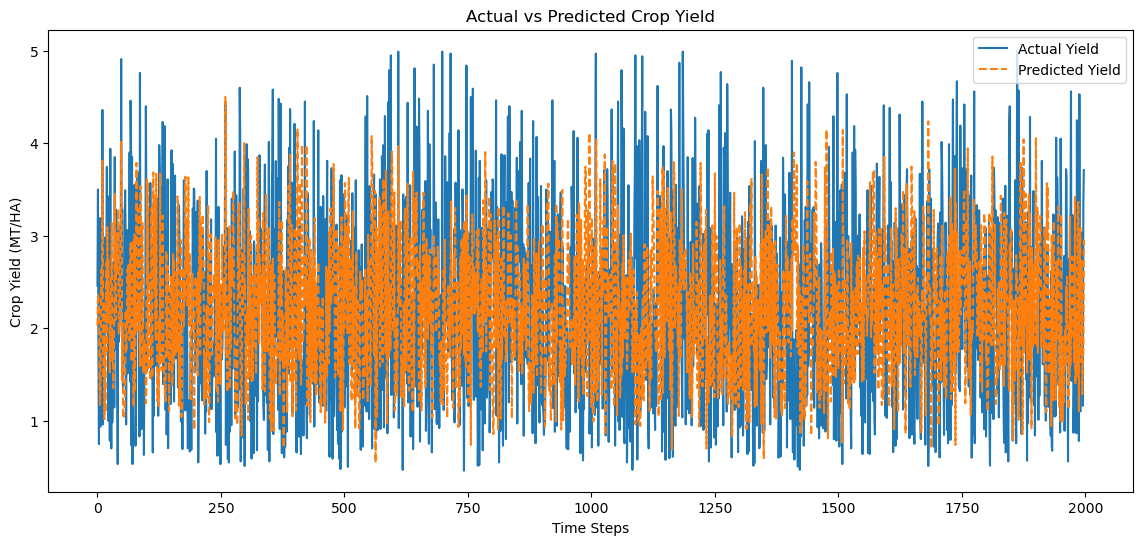

LSTM Model MSE: 1.5210261583511764


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU
from codecarbon import EmissionsTracker

features = data[['Year', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
                 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA']]
target = data['Crop_Yield_MT_per_HA']

def prepare_time_series(data, feature_columns, target_column, look_back=3):
    features, targets = [], []
    for i in range(len(data) - look_back):
        features.append(data[i:(i + look_back), feature_columns])
        targets.append(data[i + look_back, target_column])
    return np.array(features), np.array(targets)

time_series_features = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
                        'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA']
target_column = 'Crop_Yield_MT_per_HA'
selected_columns = time_series_features + [target_column]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[selected_columns])

look_back = 12  
features, targets = prepare_time_series(scaled_data, range(len(time_series_features)), len(time_series_features), look_back)

split_ratio = 0.8
split_index = int(len(features) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = targets[:split_index], targets[split_index:]

model = Sequential([
    GRU(128, return_sequences=True, input_shape=(look_back, len(time_series_features))),
    Dropout(0.3),
    GRU(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
from tensorflow.keras.utils import plot_model
#Visualize the GRU model architecture
plot_model(model, to_file='gru_model_architecture.png', show_shapes=True, show_layer_names=True)
# CodeCarbon
tracker = EmissionsTracker(allow_multiple_runs=True)
tracker.start()
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

tracker.stop()
emissions = tracker.stop()
print(f"Emissions: {emissions} kg CO2e")

y_pred = model.predict(X_test)

y_test_rescaled = scaler.inverse_transform(
    np.c_[np.zeros((len(y_test), len(time_series_features))), y_test]
)[:, -1]
y_pred_rescaled = scaler.inverse_transform(
    np.c_[np.zeros((len(y_pred), len(time_series_features))), y_pred]
)[:, -1]

plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Yield')
plt.plot(y_pred_rescaled, label='Predicted Yield', linestyle='--')
plt.legend()
plt.title("Actual vs Predicted Crop Yield")
plt.xlabel("Time Steps")
plt.ylabel("Crop Yield (MT/HA)")
plt.show()

lstm_mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print("LSTM Model MSE:", lstm_mse)